# Introduction to Time Series - Trend Decomposition with Python Codes
## Multipart series on time series analysis with Python Code applied to financial datasets.
### By: Amir Nejad, PhD.

In [1]:
import warnings
import pandas as pd
import numpy as np
import random
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# statsmodels
from statsmodels.tsa.seasonal import STL,seasonal_decompose

In [2]:
 # settings
SEED=7
warnings.filterwarnings('ignore')
random.seed( SEED )
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)
plt.rcParams['figure.figsize'] = (11, 8)
plt.style.use('fivethirtyeight')
DPI=100
LW=3

***
# Time Series Example

In [3]:
# Downloading the data
# Passegnger data example
passengers = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
passengers.Month=pd.to_datetime(passengers.Month)
# Daily Temp data
temp=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
temp.Date=pd.to_datetime(temp.Date)
#New One Family Houses Sold: United States
one_family=pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=HSN1F&scale=left&cosd=1963-01-01&coed=2020-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-10-20&revision_date=2020-10-20&nd=1963-01-01')
one_family.DATE=pd.to_datetime(one_family.DATE)
# Monthly Mean Total Sunspots
sun=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')
sun.Month=pd.to_datetime(sun.Month)

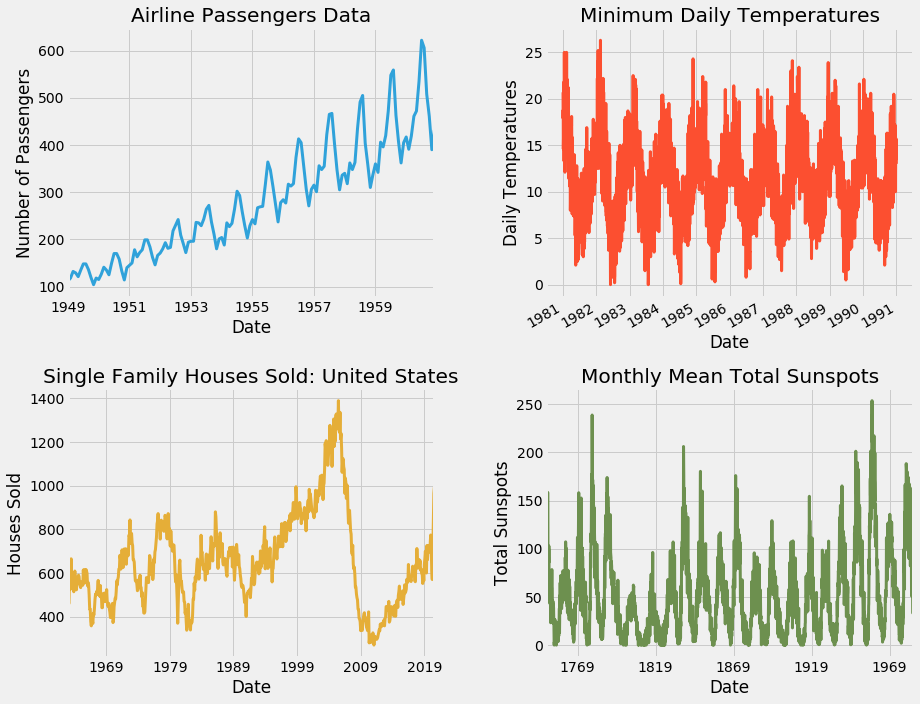

In [4]:

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(13,10))
# Airline Data
passengers.plot(x='Month',y='Passengers',ax=ax[0,0],lw=LW,color='#30a2da');
ax[0,0].set_xlabel('Date');
ax[0,0].set_ylabel('Number of Passengers');
ax[0,0].set_title('Airline Passengers Data')
ax[0,0].get_legend().set_visible(False);

# Daily Temp data
temp.plot(x='Date',y='Temp',ax=ax[0,1],lw=LW,color='#fc4f30');
ax[0,1].set_xlabel('Date');
ax[0,1].set_ylabel('Daily Temperatures');
ax[0,1].set_title('Minimum Daily Temperatures')
ax[0,1].get_legend().set_visible(False);

# New One Family Houses Sold: United States
one_family.plot(x='DATE',y='HSN1F',ax=ax[1,0],lw=LW,color='#e5ae38');
ax[1,0].set_xlabel('Date');
ax[1,0].set_ylabel('Houses Sold');
ax[1,0].set_title('Single Family Houses Sold: United States')
ax[1,0].get_legend().set_visible(False);


# Monthly Mean Total Sunspots
sun.plot(x='Month',y='Sunspots',ax=ax[1,1],lw=LW,color='#6d904f');
ax[1,1].set_xlabel('Date');
ax[1,1].set_ylabel('Total Sunspots');
ax[1,1].set_title('Monthly Mean Total Sunspots')
ax[1,1].get_legend().set_visible(False);



plt.subplots_adjust(hspace = 0.5,wspace=0.5)
fig.tight_layout()
fig.savefig('time_series_example.png', bbox_inches = 'tight', format = 'png', dpi = DPI)

***
# Trend Decomposition (Air Passenger Data)

In [28]:
passenger=pd.read_csv('AirPassengers.csv')
passenger.columns=['Date','Passengers']
passenger.Date=pd.to_datetime(passenger.Date)
passenger.set_index('Date',inplace=True)

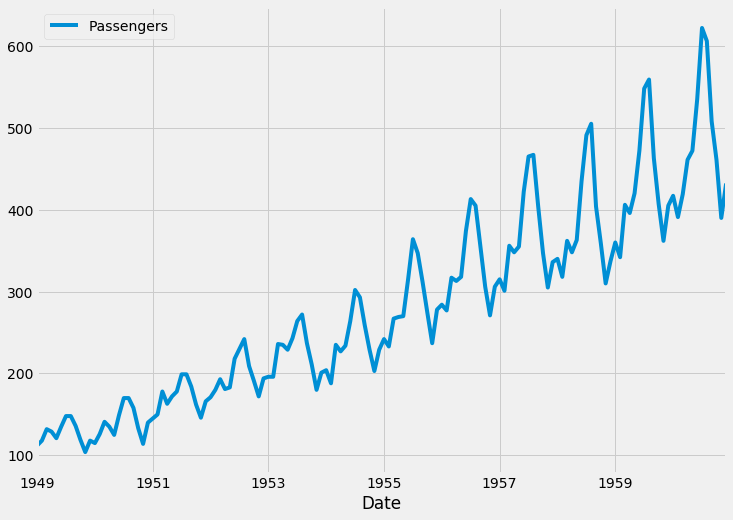

In [29]:
passenger.plot();
plt.savefig('passenger.png', bbox_inches = 'tight', format = 'png', dpi = DPI)

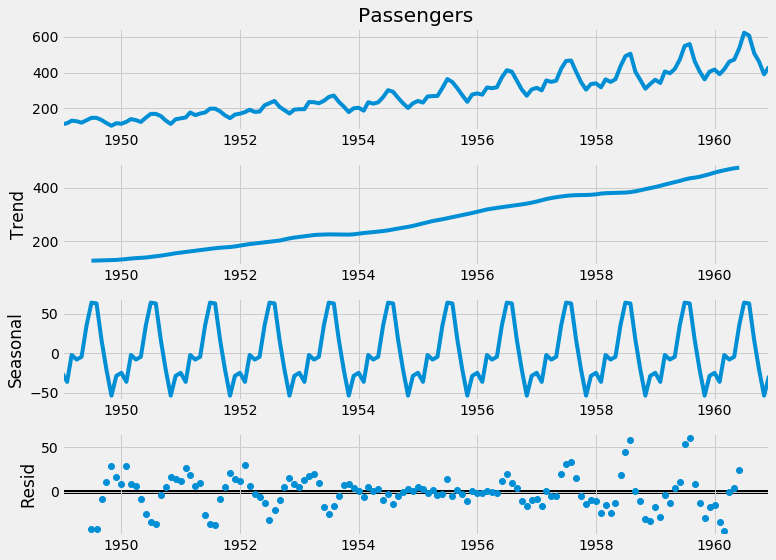

In [42]:
res = seasonal_decompose(passenger['Passengers'],model='additive', period=12)
#res= STL(passenger['Passengers'],seasonal=13,period=13,seasonal_deg=0).fit()
ax=res.plot() 
plt.savefig('Passengers_trend.png', bbox_inches = 'tight', format = 'png', dpi = DPI)
plt.show()

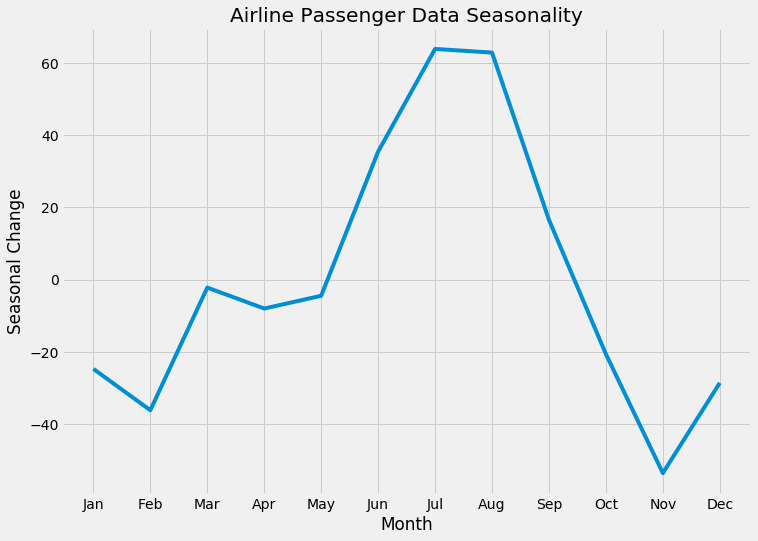

In [43]:
seasonal=res.seasonal
df=pd.DataFrame(seasonal.values,index=seasonal.index,columns=['Seasonal'])
df['Year']=seasonal.index.year
df['Month']=seasonal.index.month
df['Month_']=df.index.strftime('%b')
df=df[df.Year==1958].copy()
plt.plot(df.Month_,df.Seasonal);
plt.ylabel('Seasonal Change');
plt.xlabel('Month');
plt.title('Airline Passenger Data Seasonality')
plt.savefig('Passengers_trend_seasonal.png', bbox_inches = 'tight', format = 'png', dpi = DPI)

***
# Trend Decomposition (Gas Price Data)

In [44]:
nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)

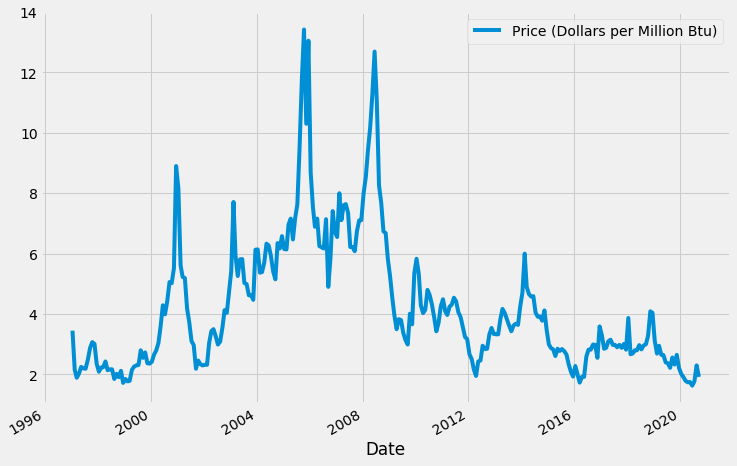

In [45]:
nat_gas.plot();
plt.savefig('natural_gas.png', bbox_inches = 'tight', format = 'png', dpi = DPI)

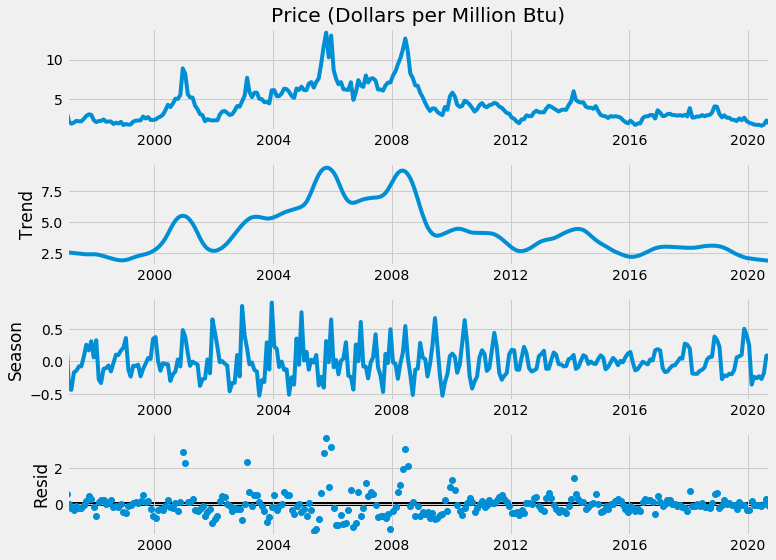

In [51]:
res = STL(nat_gas['Price (Dollars per Million Btu)'],seasonal=11,period=12).fit()
#res=seasonal_decompose(nat_gas['Price (Dollars per Million Btu)'],model='multiplicative', period=13)
ax=res.plot() 
plt.savefig('natural_gas_trend.png', bbox_inches = 'tight', format = 'png', dpi = DPI)
plt.show()

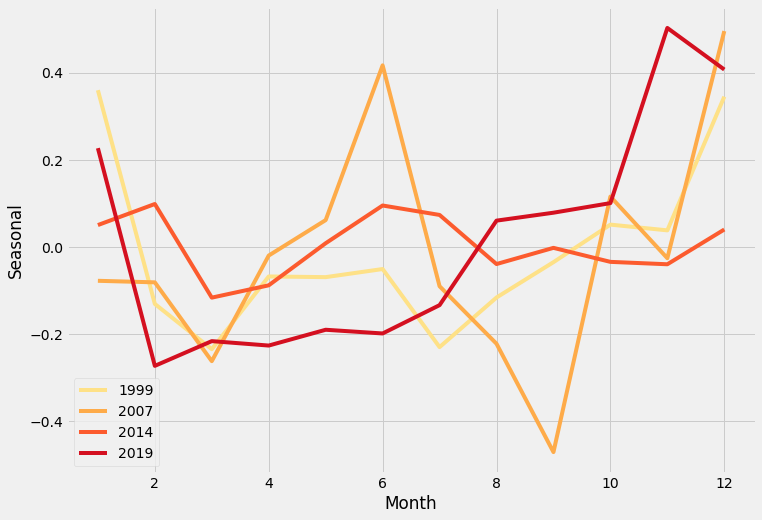

In [52]:
years=[1999,2007,2014,2019]
seasonal=res.seasonal
df=pd.DataFrame(seasonal.values,index=seasonal.index,columns=['Seasonal'])
df['Year']=seasonal.index.year
df['Month']=seasonal.index.month
df['Month_']=df.index.strftime('%b')
df_samples=df[df.Year.isin(years)].copy()
sns.lineplot(x=df_samples.Month,y=df_samples.Seasonal,hue=df_samples.Year,\
             palette=sns.color_palette("YlOrRd", len(years)));
plt.legend(years);
plt.savefig('natural_gas_seasonal.png', bbox_inches = 'tight', format = 'png', dpi = DPI)

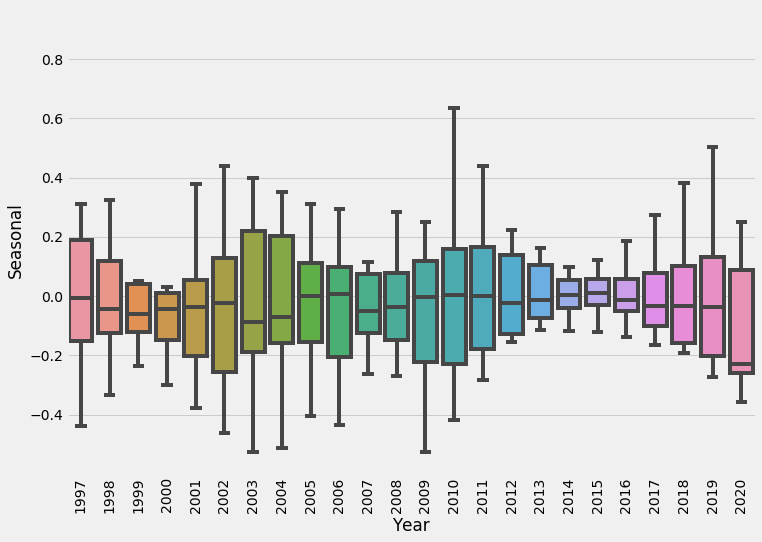

In [53]:
ax = sns.boxplot(x="Year", y="Seasonal",fliersize=0, data=df);
plt.xticks(rotation=90);
plt.savefig('natural_gas_seasonal_year.png', bbox_inches = 'tight', format = 'png', dpi = DPI);

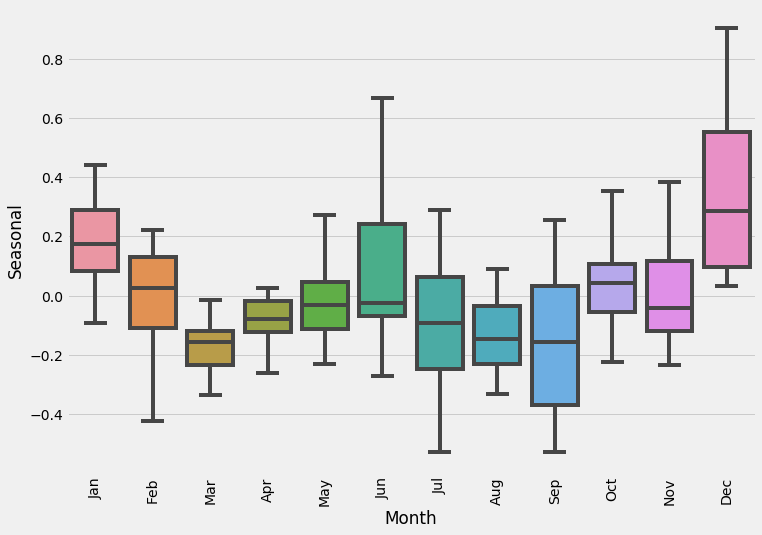

In [54]:
ax = sns.boxplot(x="Month_", y="Seasonal",fliersize=0, data=df);
plt.xticks(rotation=90);
plt.xlabel('Month')
plt.savefig('natural_gas_seasonal_month.png', bbox_inches = 'tight', format = 'png', dpi = DPI);